# OpenCV Image Thresholding

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

## simple thresholding

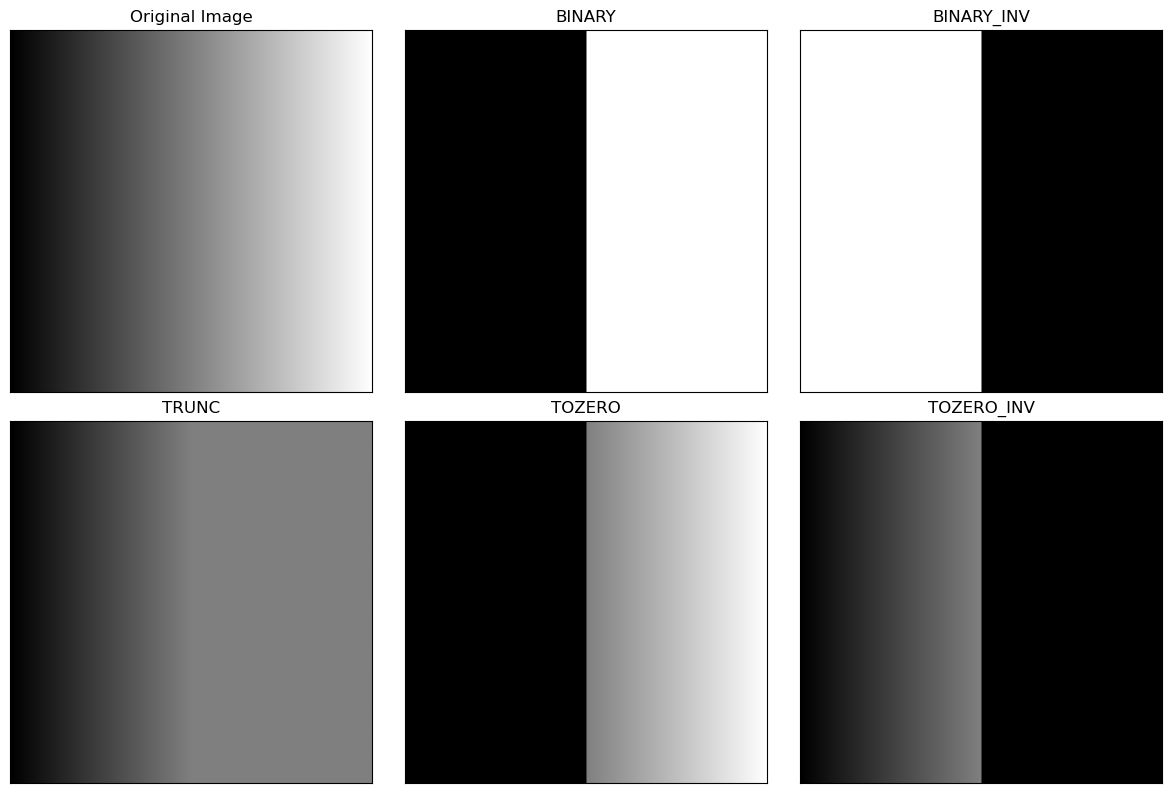

In [2]:
img = cv.imread('grad.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(12, 8), dpi=100)

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.yticks([]),plt.xticks([])
    
plt.tight_layout()
plt.show()

## praktyka

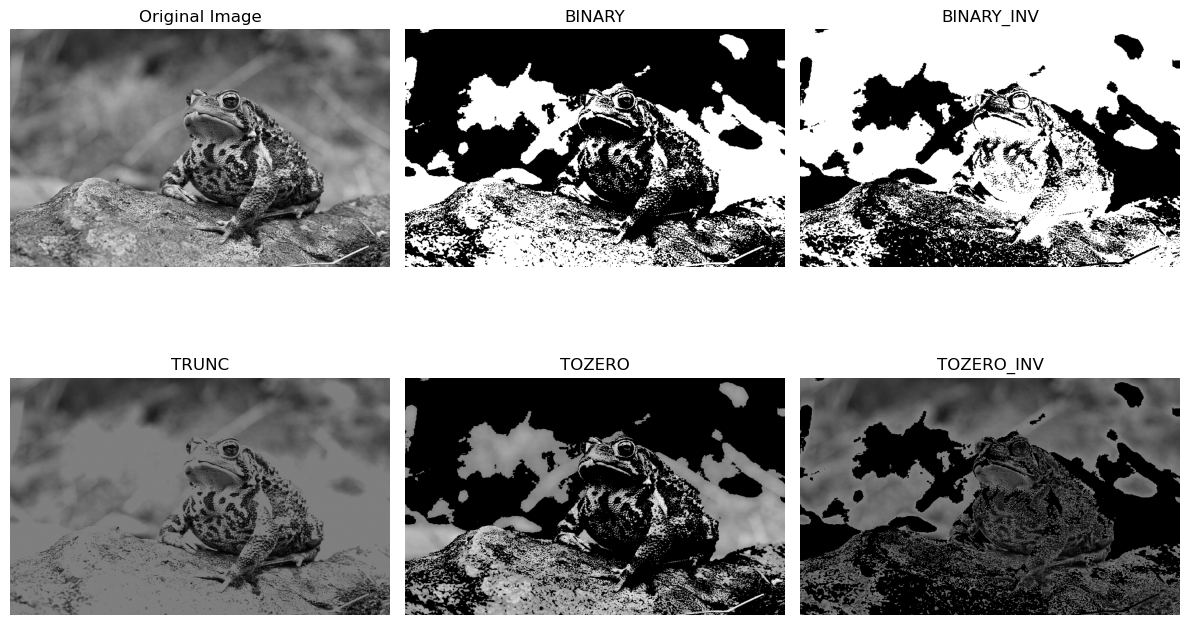

In [3]:
img = cv.imread('toad.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"

ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(12, 8), dpi=100)

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.axis(False)
    
plt.tight_layout()
plt.show()

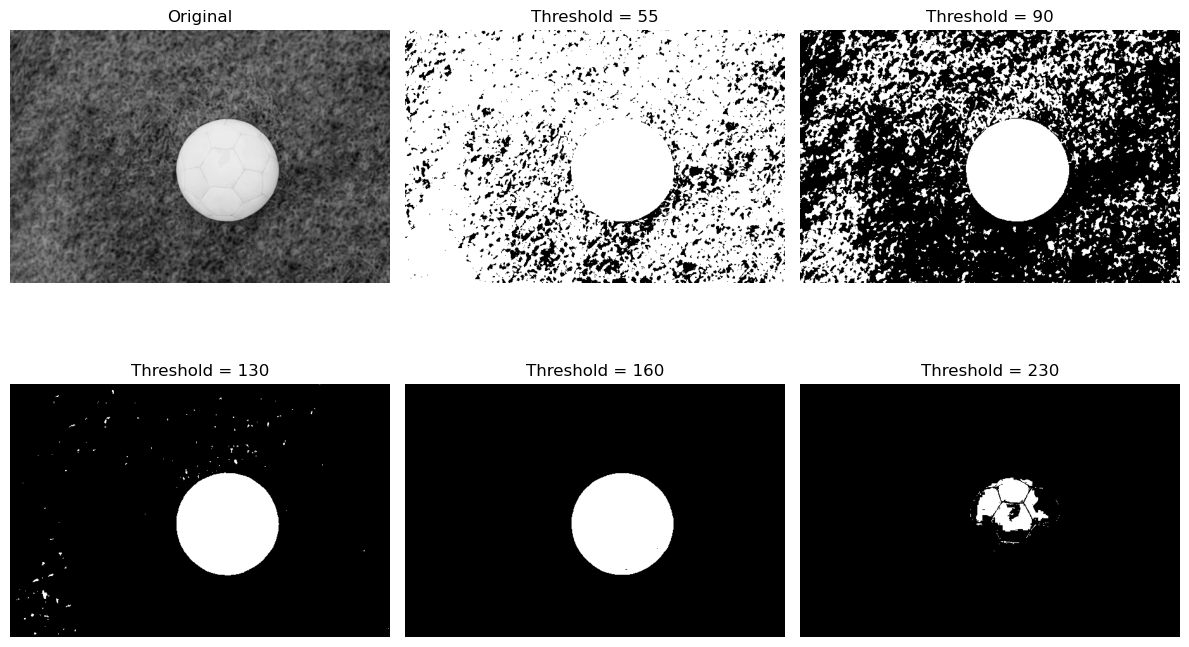

In [4]:
img = cv.imread('whiteball.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read"

threshold_values = [55, 90, 130, 160, 230]
images = [img]
titles = ['Original']

for t in threshold_values:
    _, thresh = cv.threshold(img, t, 255, cv.THRESH_BINARY)
    images.append(thresh)
    titles.append(f"Threshold = {t}")

plt.figure(figsize=(12, 8), dpi=100)

for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], cmap='gray', vmin=0, vmax=255)
    plt.title(titles[i])
    plt.axis(False)

plt.tight_layout()
plt.show()

## Otsu thresholding

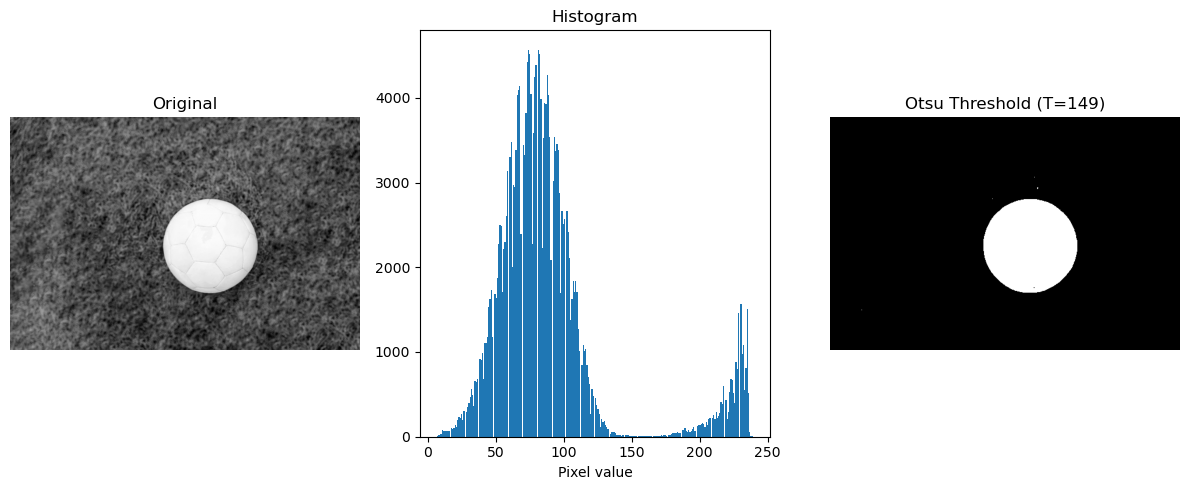

In [5]:
img = cv.imread('whiteball.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read"

ret, otsu_thresh = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')
plt.subplot(1, 3, 2)
plt.hist(img.ravel(), bins=256)
plt.title("Histogram")
plt.xlabel("Pixel value")
plt.subplot(1, 3, 3)
plt.imshow(otsu_thresh, cmap='gray')
plt.title(f"Otsu Threshold (T={int(ret)})")
plt.axis('off')

plt.tight_layout()
plt.show()

## Adaptive thresholding

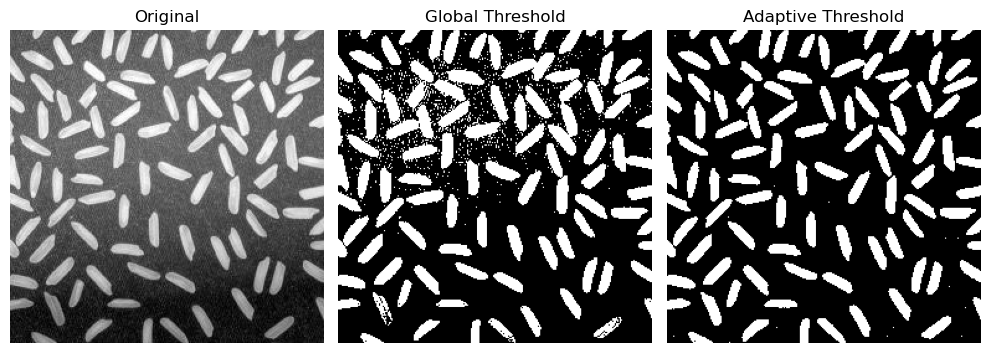

In [6]:
img = cv.imread('pillmix.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read"

_, simple_thresh = cv.threshold(img, 120, 255, cv.THRESH_BINARY)

adaptive_thresh = cv.adaptiveThreshold(
    img, 255,
    cv.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv.THRESH_BINARY,
    blockSize=41,
    C=-30
)

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis(False)

plt.subplot(1, 3, 2)
plt.imshow(simple_thresh, cmap='gray')
plt.title("Global Threshold")
plt.axis(False)

plt.subplot(1, 3, 3)
plt.imshow(adaptive_thresh, cmap='gray')
plt.title("Adaptive Threshold")
plt.axis(False)

plt.tight_layout()
plt.show()

## HSV Hue Saturation Value | wykrywanie po kolorach

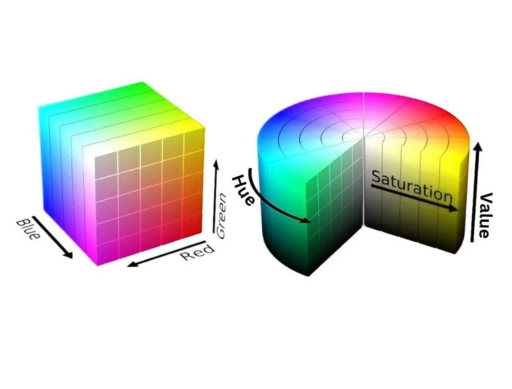

In [7]:
img = cv.imread('hsv.png')
assert img is not None, "file could not be read"
plt.imshow(img)
plt.axis(False)
plt.show()

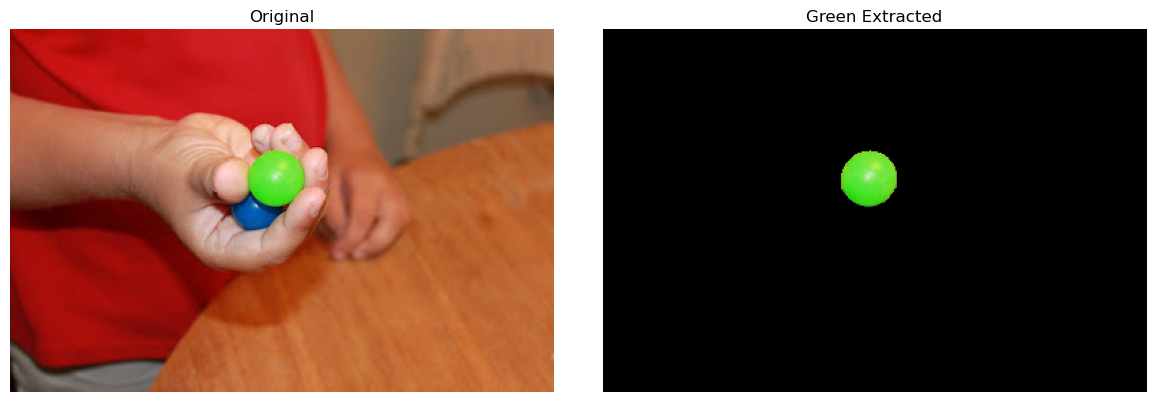

In [8]:
img = cv.imread('gradient.png')
assert img is not None, "file could not be read"

hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)
lower_green = np.array([35, 45, 40])
upper_green = np.array([85, 255, 255])
mask = cv.inRange(hsv_img, lower_green, upper_green)
result_img = cv.bitwise_and(img, img, mask=mask)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title("Original")
plt.axis(False)

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(result_img, cv.COLOR_BGR2RGB))
plt.title("Green Extracted")
plt.axis(False)
plt.tight_layout()
plt.show()